In [2]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("../dataset/kalimati.csv")

In [4]:
df.head()

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
0,0,Tomato Big(Nepali),6/16/2013,Kg,35,40,37.5
1,1,Tomato Small(Local),6/16/2013,Kg,26,32,29.0
2,2,Potato Red,6/16/2013,Kg,20,21,20.5
3,3,Potato White,6/16/2013,Kg,15,16,15.5
4,4,Onion Dry (Indian),6/16/2013,Kg,28,30,29.0


In [5]:
df = df.drop(columns=["Minimum", "Maximum", "Unit", "SN"])

In [6]:
df = df.rename(columns={"Average": "Price"})

In [7]:
df.head()

,Commodity,Date,Price
0,Tomato Big(Nepali),6/16/2013,37.5
1,Tomato Small(Local),6/16/2013,29.0
2,Potato Red,6/16/2013,20.5
3,Potato White,6/16/2013,15.5
4,Onion Dry (Indian),6/16/2013,29.0


In [8]:
df["Date"] = pd.to_datetime(df["Date"])

In [9]:
df.head()

,Commodity,Date,Price
0,Tomato Big(Nepali),2013-06-16,37.5
1,Tomato Small(Local),2013-06-16,29.0
2,Potato Red,2013-06-16,20.5
3,Potato White,2013-06-16,15.5
4,Onion Dry (Indian),2013-06-16,29.0


In [10]:
df = df[["Date", "Commodity", "Price"]]

In [11]:
df.head()

,Date,Commodity,Price
0,2013-06-16,Tomato Big(Nepali),37.5
1,2013-06-16,Tomato Small(Local),29.0
2,2013-06-16,Potato Red,20.5
3,2013-06-16,Potato White,15.5
4,2013-06-16,Onion Dry (Indian),29.0


In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["Item"] = label_encoder.fit_transform(df["Commodity"])


In [13]:
df.head()

,Date,Commodity,Price,Item
0,2013-06-16,Tomato Big(Nepali),37.5,122
1,2013-06-16,Tomato Small(Local),29.0,124
2,2013-06-16,Potato Red,20.5,96
3,2013-06-16,Potato White,15.5,99
4,2013-06-16,Onion Dry (Indian),29.0,83


In [14]:
df = df.drop(columns=["Commodity"])

In [15]:
train = df[(df["Date"] >= "2013-06-16") & (df["Date"] <= "2019-12-31")]
test = df[(df["Date"] >= "2020-01-01") & (df["Date"] <= "2021-05-13")]


In [16]:
train.head()

,Date,Price,Item
0,2013-06-16,37.5,122
1,2013-06-16,29.0,124
2,2013-06-16,20.5,96
3,2013-06-16,15.5,99
4,2013-06-16,29.0,83


In [17]:
test.head()

,Date,Price,Item
157439,2020-01-01,62.5,122
157440,2020-01-01,62.5,121
157441,2020-01-01,40.0,124
157442,2020-01-01,40.0,126
157443,2020-01-01,42.5,123


In [18]:
train.to_csv("../dataset/processed/train.csv", index=False)
test.to_csv("../dataset/processed/test.csv", index=False)


In [19]:
print(train.shape, test.shape, df.shape)



(157439, 3) (39722, 3) (197161, 3)


In [20]:
train.Item.nunique(), test.Item.nunique()

(128, 131)

In [21]:
train["Date"].min(), train["Date"].max(), test["Date"].min(), test["Date"].max()

(Timestamp('2013-06-16 00:00:00'),
 Timestamp('2019-12-31 00:00:00'),
 Timestamp('2020-01-01 00:00:00'),
 Timestamp('2021-05-13 00:00:00'))

In [22]:
df.groupby(["Item"]).agg(
    {"Price": ["count", "sum", "mean", "median", "std", "min", "max"]}
)

Price                                                         
     count       sum        mean  median         std    min     max
Item                                                               
0      395  110610.0  280.025316  290.00   39.922188  145.0   345.0
1     2683  328087.5  122.283824  105.00   36.720520   55.0   290.0
2     2020   86056.5   42.602228   42.50    8.996921   11.0    67.5
3     1055  339337.5  321.646919  305.00  148.461336   65.0  1900.0
4     1131   75852.0   67.066313   65.00   23.557621   19.0   125.0
...    ...       ...         ...     ...         ...    ...     ...
127    420   24357.0   57.992857   57.50   16.226395   27.5    85.0
128   2538  141773.5   55.860323   55.00   16.650512   22.5   145.0
129     42    1382.0   32.904762   28.75    7.563744   26.5    52.5
130   2679  123674.5   46.164427   47.50   14.457301   13.5   175.0
131   1105   48179.0   43.600905   42.50   14.704348   19.0   125.0

[132 rows x 7 columns]

Feature Engineering

In [23]:
import warnings

warnings.filterwarnings("ignore")


In [24]:
# Time-related feature == creating time related features


def create_date_features(df):
    df["month"] = df.Date.dt.month
    df["day_of_month"] = df.Date.dt.day
    df["day_of_year"] = df.Date.dt.dayofyear
    # df["week_of_year"] = df.Date.dt.weekofyear
    df["day_of_week"] = df.Date.dt.dayofweek + 1
    df["year"] = df.Date.dt.year
    df["is_wknd"] = (
        df.Date.dt.weekday // 4
    )  ### df.date.dt.weekday => Starts from '0' means '0' = 'Monday'.
    ##So, '// 4' will give '1' when day number equals
    ## so does for 5 and 6 gives '1' for //4
    df["is_month_start"] = df.Date.dt.is_month_start.astype(int)
    df["is_month_end"] = df.Date.dt.is_month_end.astype(int)
    df["is_year_start"] = df.Date.dt.is_year_start.astype(int)
    df["is_year_end"] = df.Date.dt.is_year_end.astype(int)
    return df


df = create_date_features(train)


In [25]:
df.head()

,Date,Price,Item,month,day_of_month,day_of_year,day_of_week,year,is_wknd,is_month_start,is_month_end,is_year_start,is_year_end
0,2013-06-16,37.5,122,6,16,167,7,2013,1,0,0,0,0
1,2013-06-16,29.0,124,6,16,167,7,2013,1,0,0,0,0
2,2013-06-16,20.5,96,6,16,167,7,2013,1,0,0,0,0
3,2013-06-16,15.5,99,6,16,167,7,2013,1,0,0,0,0
4,2013-06-16,29.0,83,6,16,167,7,2013,1,0,0,0,0


In [26]:
df.sort_values(by=["Item", "Date"], axis=0, inplace=True)


# Define the function to add random noise
def random_noise(dataframe):
    return np.random.normal(scale=1.6, size=(len(dataframe),))


# Define the function to create lag features
def lag_features(dataframe, lags):
    for lag in lags:
        dataframe["price_lag_" + str(lag)] = dataframe.groupby("Item")[
            "Price"
        ].transform(lambda x: x.shift(lag)) + random_noise(
            dataframe
        )  
    return dataframe

lags_list = [91, 98, 105, 112, 119, 126, 182, 364, 546, 728]

df = lag_features(df, lags_list)



In [27]:
df.tail()

,Date,Price,Item,month,day_of_month,day_of_year,day_of_week,year,is_wknd,is_month_start,...,price_lag_91,price_lag_98,price_lag_105,price_lag_112,price_lag_119,price_lag_126,price_lag_182,price_lag_364,price_lag_546,price_lag_728
157057,2019-12-27,55.0,131,12,27,361,5,2019,1,0,...,48.424317,41.334469,47.791099,46.102388,45.555761,46.618716,43.677908,54.064755,30.016101,27.156995
157143,2019-12-28,55.0,131,12,28,362,6,2019,1,0,...,48.365993,41.908155,46.494861,50.745109,48.324578,47.132325,34.443890,54.714243,30.087935,30.568237
157228,2019-12-29,55.0,131,12,29,363,7,2019,1,0,...,49.523843,44.549794,44.278653,47.955807,45.938453,36.352999,34.847445,52.864812,22.952985,30.445498
157313,2019-12-30,55.0,131,12,30,364,1,2019,0,0,...,49.753016,46.583218,44.989909,49.166171,47.200608,38.501808,37.656382,57.790490,21.252921,30.496193
157398,2019-12-31,55.0,131,12,31,365,2,2019,0,0,...,44.922414,46.128510,49.891990,47.616726,46.844956,37.184805,39.411440,54.626805,23.126197,27.297403


In [28]:
def roll_mean_features(dataframe, windows):
    for window in windows:
        dataframe["price_roll_mean_" + str(window)] = dataframe.groupby("Item")[
            "Price"
        ].transform(
            lambda x: x.shift(1)
            .rolling(window=window, min_periods=10, win_type="triang")
            .mean()
        ) + random_noise(dataframe)
    return dataframe


# List of windows to create rolling mean features
roll_mean_list = [365, 546]

# Create rolling mean features
df = roll_mean_features(df, roll_mean_list)


In [29]:
df.tail()


,Date,Price,Item,month,day_of_month,day_of_year,day_of_week,year,is_wknd,is_month_start,...,price_lag_105,price_lag_112,price_lag_119,price_lag_126,price_lag_182,price_lag_364,price_lag_546,price_lag_728,price_roll_mean_365,price_roll_mean_546
157057,2019-12-27,55.0,131,12,27,361,5,2019,1,0,...,47.791099,46.102388,45.555761,46.618716,43.677908,54.064755,30.016101,27.156995,40.293910,41.418886
157143,2019-12-28,55.0,131,12,28,362,6,2019,1,0,...,46.494861,50.745109,48.324578,47.132325,34.443890,54.714243,30.087935,30.568237,44.778188,46.685243
157228,2019-12-29,55.0,131,12,29,363,7,2019,1,0,...,44.278653,47.955807,45.938453,36.352999,34.847445,52.864812,22.952985,30.445498,45.084780,45.408283
157313,2019-12-30,55.0,131,12,30,364,1,2019,0,0,...,44.989909,49.166171,47.200608,38.501808,37.656382,57.790490,21.252921,30.496193,46.292658,44.814965
157398,2019-12-31,55.0,131,12,31,365,2,2019,0,0,...,49.891990,47.616726,46.844956,37.184805,39.411440,54.626805,23.126197,27.297403,43.375019,44.960009


In [30]:
def ewm_features(dataframe, alphas, lags):
    for alpha in alphas:
        for lag in lags:
            dataframe[
                "price_ewm_alpha_" + str(alpha).replace(".", "") + "_lag_" + str(lag)
            ] = dataframe.groupby("Item")["Price"].transform(
                lambda x: x.shift(lag).ewm(alpha=alpha).mean()
            )
    return dataframe


# Alphas and lags to create exponentially weighted mean features
alphas = [0.95, 0.9, 0.8, 0.7, 0.5]
lags = [91, 98, 105, 112, 180, 270, 365, 546, 728]

# Create exponentially weighted mean features
df = ewm_features(df, alphas, lags)


In [31]:
df.tail()

,Date,Price,Item,month,day_of_month,day_of_year,day_of_week,year,is_wknd,is_month_start,...,price_ewm_alpha_07_lag_728,price_ewm_alpha_05_lag_91,price_ewm_alpha_05_lag_98,price_ewm_alpha_05_lag_105,price_ewm_alpha_05_lag_112,price_ewm_alpha_05_lag_180,price_ewm_alpha_05_lag_270,price_ewm_alpha_05_lag_365,price_ewm_alpha_05_lag_546,price_ewm_alpha_05_lag_728
157057,2019-12-27,55.0,131,12,27,361,5,2019,1,0,...,29.426847,47.362213,44.863277,47.499475,47.432860,38.129958,38.122664,54.902954,32.796447,29.556925
157143,2019-12-28,55.0,131,12,28,362,6,2019,1,0,...,29.128054,47.431107,43.681639,46.249738,47.466430,37.814979,37.811332,54.951477,30.148224,29.278462
157228,2019-12-29,55.0,131,12,29,363,7,2019,1,0,...,29.038416,47.465553,43.090819,45.624869,47.483215,37.657489,37.655666,54.975739,26.324112,29.139231
157313,2019-12-30,55.0,131,12,30,364,1,2019,0,0,...,29.711525,47.482777,45.295410,45.312434,47.491607,37.578745,37.577833,54.987869,24.412056,29.569616
157398,2019-12-31,55.0,131,12,31,365,2,2019,0,0,...,29.213457,47.491388,46.397705,46.406217,47.495804,37.539372,37.538916,54.993935,23.456028,29.284808


In [32]:
df.shape

(157439, 70)

In [33]:
df.isnull().sum()

Date                              0
Price                             0
Item                              0
month                             0
day_of_month                      0
                              ...  
price_ewm_alpha_05_lag_180    20138
price_ewm_alpha_05_lag_270    28414
price_ewm_alpha_05_lag_365    36410
price_ewm_alpha_05_lag_546    51290
price_ewm_alpha_05_lag_728    65850
Length: 70, dtype: int64

In [34]:
df = pd.get_dummies(df, columns=["Item"])

In [35]:
df

,Date,Price,month,day_of_month,day_of_year,day_of_week,year,is_wknd,is_month_start,is_month_end,...,Item_122,Item_123,Item_124,Item_125,Item_126,Item_127,Item_128,Item_129,Item_130,Item_131
141053,2019-05-31,255.0,5,31,151,5,2019,1,0,1,...,False,False,False,False,False,False,False,False,False,False
141130,2019-06-01,255.0,6,1,152,6,2019,1,1,0,...,False,False,False,False,False,False,False,False,False,False
141203,2019-06-02,255.0,6,2,153,7,2019,1,0,0,...,False,False,False,False,False,False,False,False,False,False
141278,2019-06-03,255.0,6,3,154,1,2019,0,0,0,...,False,False,False,False,False,False,False,False,False,False
141358,2019-06-04,345.0,6,4,155,2,2019,0,0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157057,2019-12-27,55.0,12,27,361,5,2019,1,0,0,...,False,False,False,False,False,False,False,False,False,True
157143,2019-12-28,55.0,12,28,362,6,2019,1,0,0,...,False,False,False,False,False,False,False,False,False,True
157228,2019-12-29,55.0,12,29,363,7,2019,1,0,0,...,False,False,False,False,False,False,False,False,False,True
157313,2019-12-30,55.0,12,30,364,1,2019,0,0,0,...,False,False,False,False,False,False,False,False,False,True


In [36]:
df.fillna(method="ffill", inplace=True)

# Backward fill any remaining missing values
df.fillna(method="bfill", inplace=True)

# Check for any remaining missing values
print(df.isnull().sum())


Date            0
Price           0
month           0
day_of_month    0
day_of_year     0
               ..
Item_127        0
Item_128        0
Item_129        0
Item_130        0
Item_131        0
Length: 197, dtype: int64


In [37]:
df["Price"] = np.log1p(df["Price"].values)

In [38]:
df.drop(columns=["Commodity"], inplace=True, errors="ignore")

In [39]:
#  train and validation set.
train = df.loc[(df["Date"] < "2019-01-01"), :]  # Until beginning of 2017
val = df.loc[
    (df["Date"] >= "2019-01-01") & (df["Date"] < "2019-04-01"), :
]  # First 3 months of 2019

# dropping useless column
cols = [col for col in train.columns if col not in ["Date", "id", "Price", "year"]]

Y_train = train["Price"]
X_train = train[cols]

Y_val = val["Price"]
X_val = val[cols]

Y_train.shape, X_train.shape, Y_val.shape, X_val.shape


((131242,), (131242, 194), (5868,), (5868, 194))

In [40]:
train.head()

,Date,Price,month,day_of_month,day_of_year,day_of_week,year,is_wknd,is_month_start,is_month_end,...,Item_122,Item_123,Item_124,Item_125,Item_126,Item_127,Item_128,Item_129,Item_130,Item_131
50,2013-06-16,4.709530,6,16,167,7,2013,1,0,0,...,False,False,False,False,False,False,False,False,False,False
123,2013-06-17,4.795791,6,17,168,1,2013,0,0,0,...,False,False,False,False,False,False,False,False,False,False
196,2013-06-18,4.753590,6,18,169,2,2013,0,0,0,...,False,False,False,False,False,False,False,False,False,False
269,2013-06-19,4.753590,6,19,170,3,2013,0,0,0,...,False,False,False,False,False,False,False,False,False,False
343,2013-06-20,4.753590,6,20,171,4,2013,0,0,0,...,False,False,False,False,False,False,False,False,False,False


Lgbm Model

In [41]:
# light bgm model
import lightgbm as lgb
import shap
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer
from lightgbm import LGBMRegressor


In [42]:
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_absolute_percentage_error,
)

In [43]:
##SMAPE score


def smape(preds, target):
    n = len(preds)
    masked_arr = ~((preds == 0) & (target == 0))
    preds, target = preds[masked_arr], target[masked_arr]
    num = np.abs(preds - target)
    denom = np.abs(preds) + np.abs(target)
    smape_val = (200 * np.sum(num / denom)) / n
    return smape_val


# Calculating SMAPE for LightGBM output:
def lgbm_smape(preds, train_data):
    labels = train_data.get_label()
    smape_val = smape(np.expm1(preds), np.expm1(labels))
    return "SMAPE", smape_val, False


In [44]:
# lgbm in without any parameters
first_model = lgb.LGBMRegressor().fit(X_train, Y_train)

print("TRAIN SMAPE:", smape(Y_train, first_model.predict(X_train)))
print("VALID SMAPE:", smape(Y_val, first_model.predict(X_val)))
pred = first_model.predict(X_train)
print("MAE:", mean_absolute_error(Y_train, pred))
print("RMSE:", mean_squared_error(Y_train, pred))
print("R2 Score:", r2_score(Y_train, pred))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.043002 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15026
[LightGBM] [Info] Number of data points in the train set: 131242, number of used features: 159
[LightGBM] [Info] Start training from score 4.168860
TRAIN SMAPE: 4.686086128094515
VALID SMAPE: 6.31176046814095
MAE: 0.18794456407654145
RMSE: 0.06381707383317857
R2 Score: 0.8663318487144797


Catboost Regressor

In [45]:
from catboost import CatBoostRegressor
first_model = CatBoostRegressor()
first_model.fit(X_train, Y_train)

print("TRAIN SMAPE:", smape(Y_train, first_model.predict(X_train)))
print("VALID SMAPE:", smape(Y_val, first_model.predict(X_val)))
pred = first_model.predict(X_train)
print("MAE:",mean_absolute_error(Y_train, pred))
print("RMSE:",mean_squared_error(Y_train, pred))
print("R2 Score:",r2_score(Y_train, pred))

Learning rate set to 0.088478
0:	learn: 0.6495569	total: 150ms	remaining: 2m 30s
1:	learn: 0.6125628	total: 178ms	remaining: 1m 28s
2:	learn: 0.5795941	total: 212ms	remaining: 1m 10s
3:	learn: 0.5504002	total: 242ms	remaining: 1m
4:	learn: 0.5246921	total: 273ms	remaining: 54.3s
5:	learn: 0.5023736	total: 309ms	remaining: 51.1s
6:	learn: 0.4823706	total: 333ms	remaining: 47.2s
7:	learn: 0.4648028	total: 363ms	remaining: 45s
8:	learn: 0.4494985	total: 400ms	remaining: 44.1s
9:	learn: 0.4361158	total: 437ms	remaining: 43.3s
10:	learn: 0.4247329	total: 465ms	remaining: 41.8s
11:	learn: 0.4146148	total: 495ms	remaining: 40.7s
12:	learn: 0.4058326	total: 521ms	remaining: 39.5s
13:	learn: 0.3979095	total: 556ms	remaining: 39.2s
14:	learn: 0.3913582	total: 584ms	remaining: 38.4s
15:	learn: 0.3855665	total: 612ms	remaining: 37.7s
16:	learn: 0.3806797	total: 639ms	remaining: 37s
17:	learn: 0.3764554	total: 669ms	remaining: 36.5s
18:	learn: 0.3722572	total: 699ms	remaining: 36.1s
19:	learn: 0.36

In [46]:
from xgboost.sklearn import XGBRegressor
first_model = XGBRegressor()
first_model.fit(X_train, Y_train)
print("TRAIN SMAPE:", smape(Y_train, first_model.predict(X_train)))
print("VALID SMAPE:", smape(Y_val, first_model.predict(X_val)))
pred = first_model.predict(X_train)
print("MAE:",mean_absolute_error(Y_train, pred))
print("RMSE:",mean_squared_error(Y_train, pred))
print("R2 Score:",r2_score(Y_train, pred))

TRAIN SMAPE: 3.469228787354121
VALID SMAPE: 6.197158248742891
MAE: 0.1386690396353429
RMSE: 0.03633456934009835
R2 Score: 0.9238953712584445


Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression
first_model = LinearRegression()
first_model.fit(X_train, Y_train)
print("TRAIN SMAPE:", smape(Y_train, first_model.predict(X_train)))
print("VALID SMAPE:", smape(Y_val, first_model.predict(X_val)))
pred = first_model.predict(X_train)
print("MAE:",mean_absolute_error(Y_train, pred))
print("RMSE:",mean_squared_error(Y_train, pred))
print("R2 Score:",r2_score(Y_train, pred))

TRAIN SMAPE: 6.228035635095165
VALID SMAPE: 7.688221051903615
MAE: 0.2501022880069435
RMSE: 0.11009158072577217
R2 Score: 0.769407508307536


In [48]:
from sklearn.ensemble import RandomForestRegressor
first_model = RandomForestRegressor()
first_model.fit(X_train,Y_train)
print("TRAIN SMAPE:", smape(Y_train, first_model.predict(X_train)))
print("VALID SMAPE:", smape(Y_val, first_model.predict(X_val)))
pred = first_model.predict(X_train)
print("MAE:",mean_absolute_error(Y_train, pred))
print("RMSE:",mean_squared_error(Y_train, pred))
print("R2 Score:",r2_score(Y_train, pred))

TRAIN SMAPE: 0.7497864753079253
VALID SMAPE: 6.835093603663148
MAE: 0.02921832597199642
RMSE: 0.0023283887338011616
R2 Score: 0.99512306975505


In [49]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
import seaborn as sns

In [51]:
# def plot_importances(first_model, plot=False, num=10):


#     gain = first_model.booster_.feature_importance(importance_type='gain')
#     feat_imp = pd.DataFrame({'feature': first_model.feature_name_,
#                              'split': first_model.booster_.feature_importance(importance_type='split'),
#                              'gain': 100 * gain / gain.sum()}).sort_values('gain', ascending=False)
#     if plot:
#         plt.figure(figsize=(10, 10))
#         sns.set(font_scale=1)
#         plt.title('feature')
#         plt.tight_layout()
#         plt.show()
#     else:
#         print(feat_imp.head(num))
#         return feat_imp
# feature_imp_df = plot_importances(first_model, num=50)

Training Linear Regression...
Feature importances for Linear Regression:


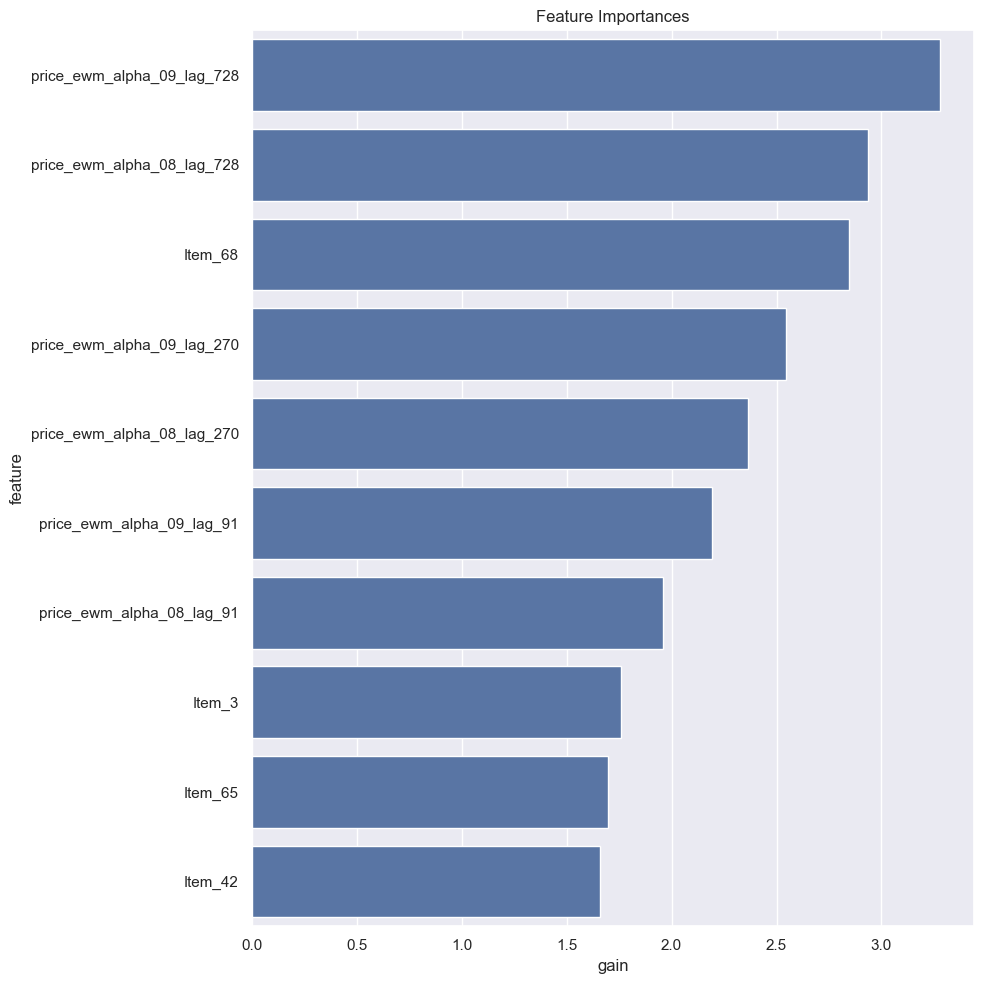

Training CatBoost...
Learning rate set to 0.088478
0:	learn: 0.6495569	total: 41.5ms	remaining: 41.5s
1:	learn: 0.6125628	total: 74.7ms	remaining: 37.3s
2:	learn: 0.5795941	total: 109ms	remaining: 36.4s
3:	learn: 0.5504002	total: 142ms	remaining: 35.3s
4:	learn: 0.5246921	total: 175ms	remaining: 34.9s
5:	learn: 0.5023736	total: 209ms	remaining: 34.6s
6:	learn: 0.4823706	total: 238ms	remaining: 33.8s
7:	learn: 0.4648028	total: 274ms	remaining: 34s
8:	learn: 0.4494985	total: 302ms	remaining: 33.2s
9:	learn: 0.4361158	total: 331ms	remaining: 32.7s
10:	learn: 0.4247329	total: 358ms	remaining: 32.2s
11:	learn: 0.4146148	total: 400ms	remaining: 33s
12:	learn: 0.4058326	total: 436ms	remaining: 33.1s
13:	learn: 0.3979095	total: 468ms	remaining: 33s
14:	learn: 0.3913582	total: 502ms	remaining: 32.9s
15:	learn: 0.3855665	total: 535ms	remaining: 32.9s
16:	learn: 0.3806797	total: 562ms	remaining: 32.5s
17:	learn: 0.3764554	total: 590ms	remaining: 32.2s
18:	learn: 0.3722572	total: 620ms	remaining: 

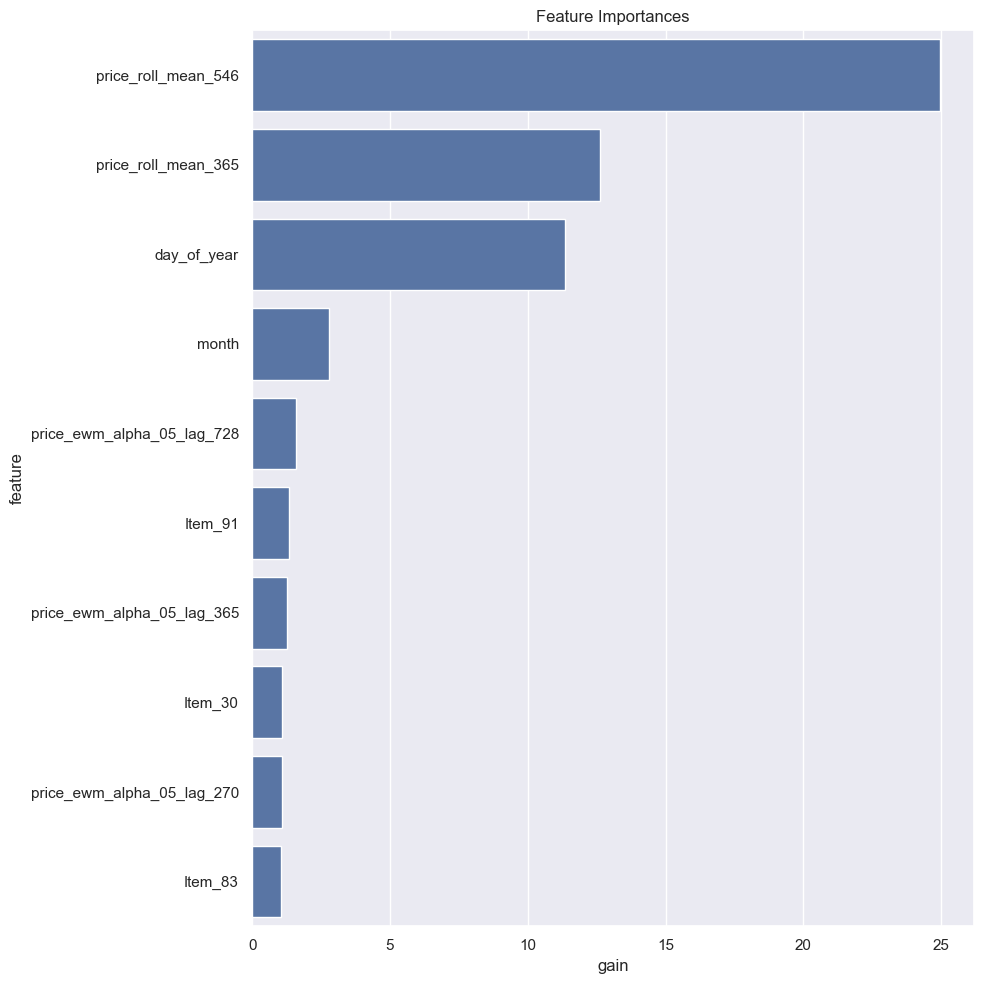

Training XGBoost...
Feature importances for XGBoost:


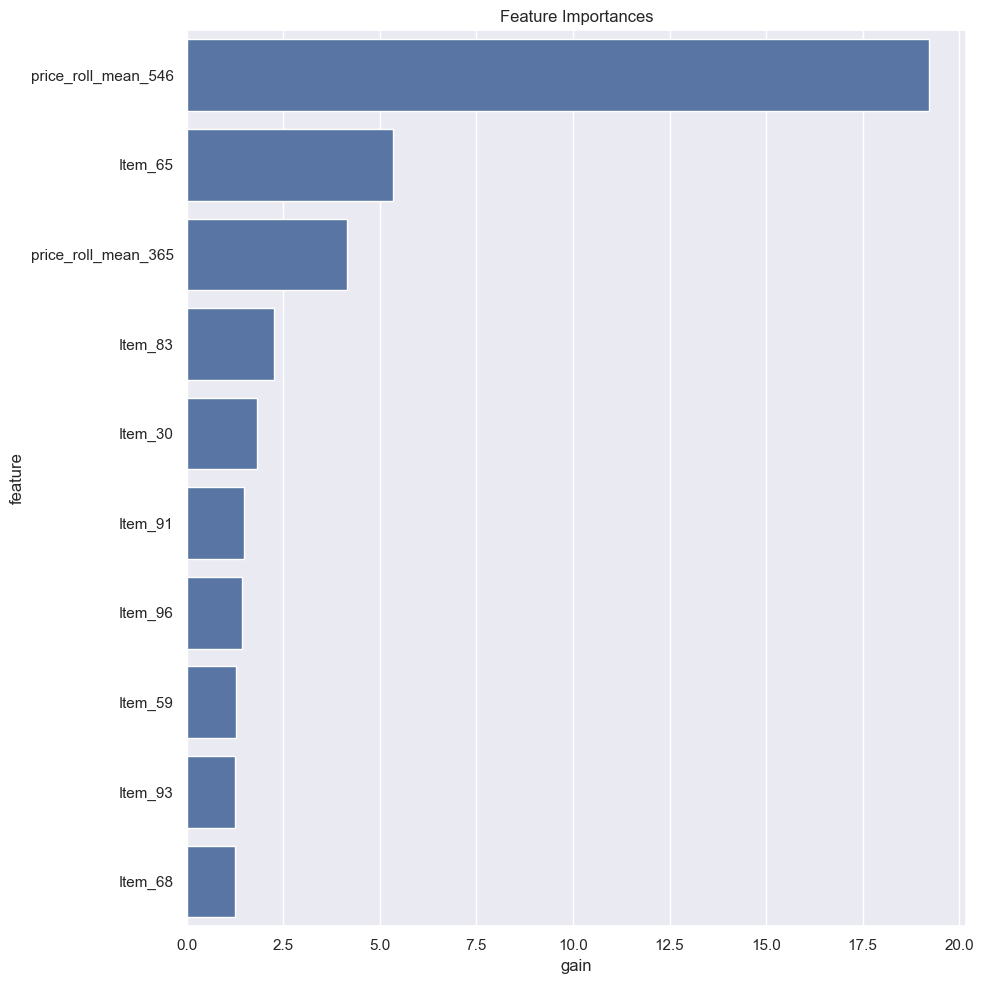

Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.065061 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15026
[LightGBM] [Info] Number of data points in the train set: 131242, number of used features: 159
[LightGBM] [Info] Start training from score 4.168860
Feature importances for LightGBM:


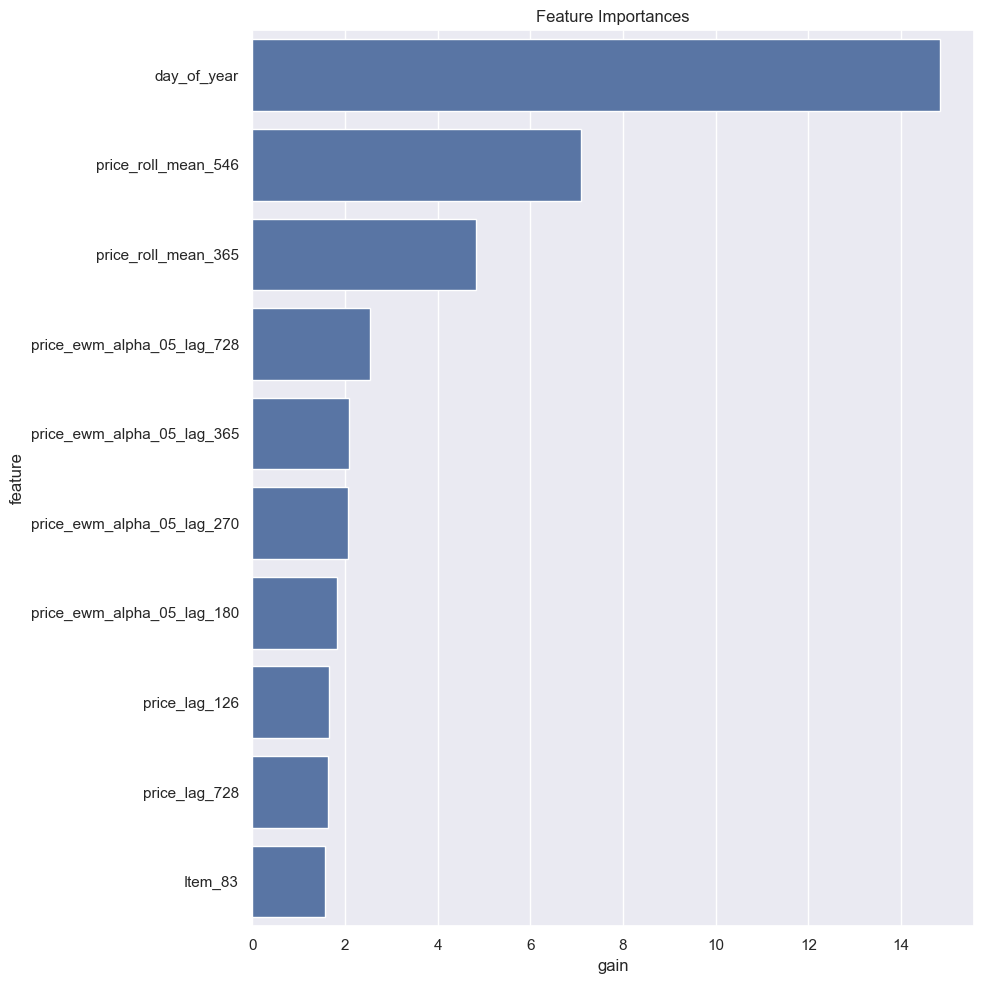

Training Random Forest...
Feature importances for Random Forest:


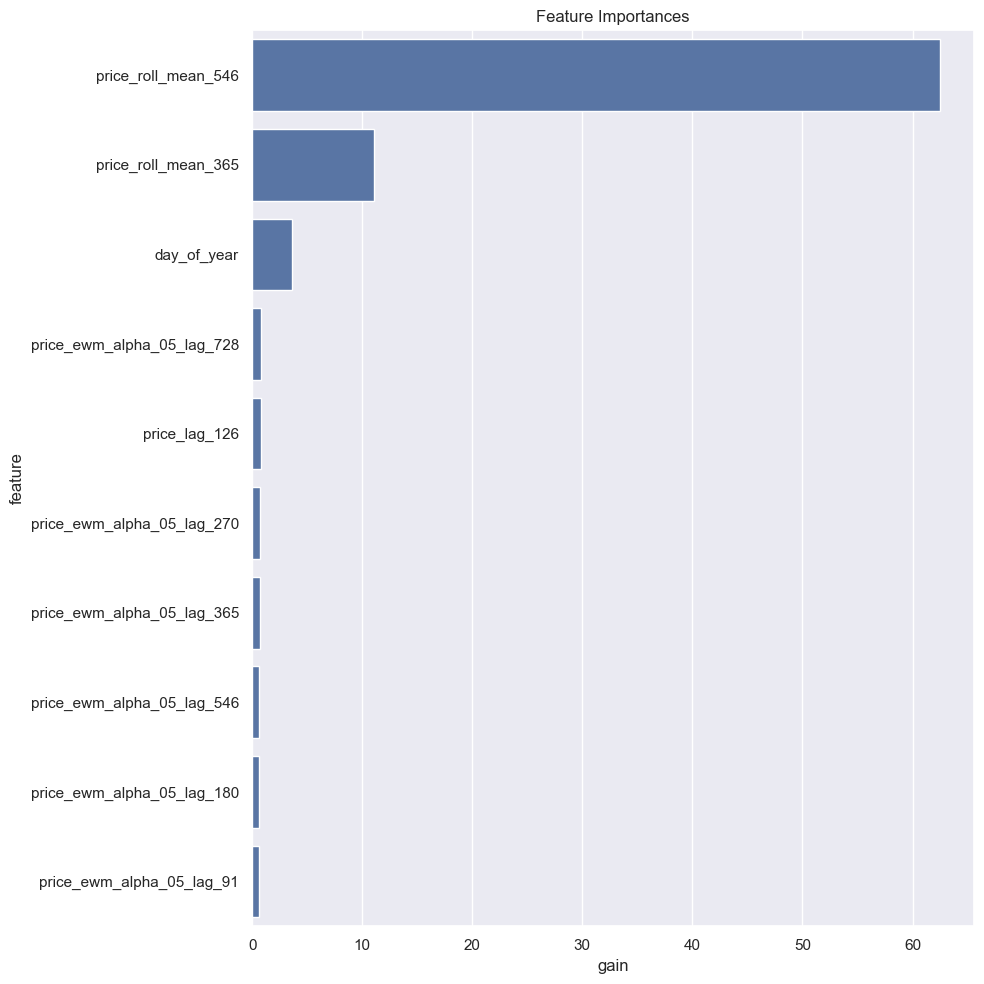

In [52]:

def plot_importances(model, X_train, plot=False, num=10):
    # Check for model type and fetch feature importances
    if hasattr(model, 'feature_importances_'):
        # LightGBM, RandomForest, XGBoost (sklearn API)
        gain = model.feature_importances_
        feat_imp = pd.DataFrame({'feature': X_train.columns,
                                 'gain': 100 * gain / gain.sum()}).sort_values('gain', ascending=False)
    elif hasattr(model, 'coef_'):
        # Linear Regression
        gain = np.abs(model.coef_)
        feat_imp = pd.DataFrame({'feature': X_train.columns,
                                 'gain': 100 * gain / gain.sum()}).sort_values('gain', ascending=False)
    elif hasattr(model, 'get_feature_importance'):
        # CatBoost
        gain = model.get_feature_importance(type='FeatureImportance')
        feat_imp = pd.DataFrame({'feature': model.feature_names_,
                                 'gain': 100 * gain / gain.sum()}).sort_values('gain', ascending=False)
    elif hasattr(model, 'booster_'):
        # XGBoost
        booster = model.booster_
        gain = booster.get_score(importance_type='gain')
        feat_imp = pd.DataFrame({'feature': list(gain.keys()),
                                 'gain': 100 * pd.Series(list(gain.values())) / sum(gain.values())}).sort_values('gain', ascending=False)
    else:
        raise ValueError("Model type not supported for feature importances extraction")

    if plot:
        plt.figure(figsize=(10, 10))
        sns.set(font_scale=1)
        sns.barplot(x='gain', y='feature', data=feat_imp.head(num))
        plt.title('Feature Importances')
        plt.tight_layout()
        plt.show()
    else:
        print(feat_imp.head(num))
        return feat_imp


# Assuming X_train and Y_train are already defined
models = {
    'Linear Regression': LinearRegression(),
    'CatBoost': CatBoostRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor(),
    'Random Forest': RandomForestRegressor()
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, Y_train)
    print(f"Feature importances for {name}:")
    plot_importances(model, X_train, plot=True, num=10)


In [54]:
feature_imp_df = plot_importances(first_model, X_train, plot=False, num=50)

# List top features
attributes = feature_imp_df['feature'].tolist()

                         feature       gain
20           price_roll_mean_546  62.266080
19           price_roll_mean_365  11.236812
2                    day_of_year   3.650677
14                 price_lag_126   0.787667
65    price_ewm_alpha_05_lag_728   0.774556
62    price_ewm_alpha_05_lag_270   0.721098
63    price_ewm_alpha_05_lag_365   0.674802
64    price_ewm_alpha_05_lag_546   0.654737
61    price_ewm_alpha_05_lag_180   0.632647
57     price_ewm_alpha_05_lag_91   0.599010
16                 price_lag_364   0.525786
145                      Item_83   0.510956
13                 price_lag_119   0.481534
18                 price_lag_728   0.411059
15                 price_lag_182   0.400731
60    price_ewm_alpha_05_lag_112   0.391478
17                 price_lag_546   0.372014
59    price_ewm_alpha_05_lag_105   0.356923
58     price_ewm_alpha_05_lag_98   0.356077
47    price_ewm_alpha_08_lag_728   0.324657
56    price_ewm_alpha_07_lag_728   0.303769
53    price_ewm_alpha_07_lag_270

In [60]:
data=df[attributes + ['Price']]

In [61]:
data.head()

,price_roll_mean_546,price_roll_mean_365,day_of_year,price_lag_126,price_ewm_alpha_05_lag_728,price_ewm_alpha_05_lag_270,price_ewm_alpha_05_lag_365,price_ewm_alpha_05_lag_546,price_ewm_alpha_05_lag_180,price_ewm_alpha_05_lag_91,...,Item_44,Item_43,Item_102,Item_76,Item_87,Item_37,Item_66,Item_85,Item_82,Price
141053,273.905714,272.217403,151,108.293429,110.0,110.0,110.0,110.0,110.0,110.0,...,False,False,False,False,False,False,False,False,False,5.545177
141130,273.905714,272.217403,152,108.293429,110.0,110.0,110.0,110.0,110.0,110.0,...,False,False,False,False,False,False,False,False,False,5.545177
141203,273.905714,272.217403,153,108.293429,110.0,110.0,110.0,110.0,110.0,110.0,...,False,False,False,False,False,False,False,False,False,5.545177
141278,273.905714,272.217403,154,108.293429,110.0,110.0,110.0,110.0,110.0,110.0,...,False,False,False,False,False,False,False,False,False,5.545177
141358,273.905714,272.217403,155,108.293429,110.0,110.0,110.0,110.0,110.0,110.0,...,False,False,False,False,False,False,False,False,False,5.846439


In [62]:
data.isnull().sum()

price_roll_mean_546           0
price_roll_mean_365           0
day_of_year                   0
price_lag_126                 0
price_ewm_alpha_05_lag_728    0
                             ..
Item_37                       0
Item_66                       0
Item_85                       0
Item_82                       0
Price                         0
Length: 195, dtype: int64

In [63]:
data.shape

(157439, 195)

In [64]:
dy = data['Price']
dy

141053    5.545177
141130    5.545177
141203    5.545177
141278    5.545177
141358    5.846439
            ...   
157057    4.025352
157143    4.025352
157228    4.025352
157313    4.025352
157398    4.025352
Name: Price, Length: 157439, dtype: float64

In [65]:
dx = data.drop(['Price'],axis = 1)
dx

,price_roll_mean_546,price_roll_mean_365,day_of_year,price_lag_126,price_ewm_alpha_05_lag_728,price_ewm_alpha_05_lag_270,price_ewm_alpha_05_lag_365,price_ewm_alpha_05_lag_546,price_ewm_alpha_05_lag_180,price_ewm_alpha_05_lag_91,...,Item_45,Item_44,Item_43,Item_102,Item_76,Item_87,Item_37,Item_66,Item_85,Item_82
141053,273.905714,272.217403,151,108.293429,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,...,False,False,False,False,False,False,False,False,False,False
141130,273.905714,272.217403,152,108.293429,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,...,False,False,False,False,False,False,False,False,False,False
141203,273.905714,272.217403,153,108.293429,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,...,False,False,False,False,False,False,False,False,False,False
141278,273.905714,272.217403,154,108.293429,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,...,False,False,False,False,False,False,False,False,False,False
141358,273.905714,272.217403,155,108.293429,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157057,41.418886,40.293910,361,46.618716,29.556925,38.122664,54.902954,32.796447,38.129958,47.362213,...,False,False,False,False,False,False,False,False,False,False
157143,46.685243,44.778188,362,47.132325,29.278462,37.811332,54.951477,30.148224,37.814979,47.431107,...,False,False,False,False,False,False,False,False,False,False
157228,45.408283,45.084780,363,36.352999,29.139231,37.655666,54.975739,26.324112,37.657489,47.465553,...,False,False,False,False,False,False,False,False,False,False
157313,44.814965,46.292658,364,38.501808,29.569616,37.577833,54.987869,24.412056,37.578745,47.482777,...,False,False,False,False,False,False,False,False,False,False


In [66]:
from sklearn.model_selection import train_test_split

In [67]:
dx_train,dx_test,dy_train,dy_test = train_test_split(dx,dy,test_size = 0.3,random_state = 0)

Hyperparameter tuning for Linear Regression

In [69]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dx_train_scaled = scaler.fit_transform(dx_train)
dx_test_scaled = scaler.transform(dx_test)

In [70]:
lr = RandomizedSearchCV(LinearRegression(),{
    'fit_intercept': [True, False],
    'copy_X': [True, False],
},
                       cv = 5,
                       return_train_score = False,
                       n_iter = 2)
lr.fit(dx_train,dy_train)
print("The best hyperparameters :")
print(lr.best_params_)
print("")
print("The best score:")
print(lr.best_score_)

The best hyperparameters :
{'fit_intercept': False, 'copy_X': False}

The best score:
0.7598654012694712


In [72]:
second_model = LinearRegression(fit_intercept =   False, copy_X = False)
second_model.fit(dx_train, dy_train)
print("TRAIN SMAPE:", smape(dy_train, second_model.predict(dx_train)))
print("VALID SMAPE:", smape(dy_test, second_model.predict(dx_test)))
pred = second_model.predict(dx_train)
print("MAE:",mean_absolute_error(dy_train, pred))
print("RMSE:",mean_squared_error(dy_train, pred))
print("R2 Score:",r2_score(dy_train, pred))

TRAIN SMAPE: 6.338758712262467
VALID SMAPE: 6.380922670436372
MAE: 0.257001742430129
RMSE: 0.11541894868749103
R2 Score: 0.7610305881801557


In [73]:

second_model = LinearRegression()
second_model.fit(dx_train, dy_train)
print("TRAIN SMAPE:", smape(dy_train, second_model.predict(dx_train)))
print("VALID SMAPE:", smape(dy_test, second_model.predict(dx_test)))
pred = second_model.predict(dx_train)
print("MAE:",mean_absolute_error(dy_train, pred))
print("RMSE:",mean_squared_error(dy_train, pred))
print("R2 Score:",r2_score(dy_train, pred))

TRAIN SMAPE: 6.338758712262507
VALID SMAPE: 6.380922670436392
MAE: 0.25700174243012697
RMSE: 0.11541894868749107
R2 Score: 0.7610305881801556



Hyperparameter tuning for Catboost

In [74]:
cv = ShuffleSplit(n_splits = 2, test_size = .33, random_state = 10)

cb = RandomizedSearchCV(CatBoostRegressor(),{ 
        "objective": ["RMSE", "MAE","MAPE"],
        'learning_rate' :[0.005,0.01,0.015,0.02,0.025,0.03],
        "colsample_bylevel":[0.1,0.2,0.3,0.4,0.5],
        "max_depth": [3,6,9,12,15],
        "boosting_type":["Ordered", "Plain"],
        "bootstrap_type":["Bayesian", "Bernoulli", "MVS"],
        "iterations": [30, 50, 100]
},
                       cv = cv,
                       verbose = 2,
                       #random_state = 42,
                       return_train_score = False,
                       n_jobs = -1,
                       n_iter = 100)
cb.fit(dx_train,dy_train)
print("The best hyperparameters :")
print(cb.best_params_)
print("")
print("The best score:")
print(cb.best_score_)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


In [ ]:
second_model = CatBoostRegressor(objective='RMSE', 
                                         max_depth= 15, 
                                         learning_rate= 0.03, 
                                         iterations= 100, 
                                         colsample_bylevel= 0.4, 
                                         bootstrap_type='MVS', 
                                         boosting_type='Ordered')
second_model.fit(dx_train, dy_train)
print("TRAIN SMAPE:", smape(dy_train, second_model.predict(dx_train)))
print("VALID SMAPE:", smape(dy_test, second_model.predict(dx_test)))
pred = second_model.predict(dx_train)
print("MAE:",mean_absolute_error(dy_train, pred))
print("RMSE:",mean_squared_error(dy_train, pred))
print("R2 Score:",r2_score(dy_train, pred))

Hyperparameter tuning for XgBoost

In [ ]:
cv = ShuffleSplit(n_splits = 2, test_size =0.33, random_state = 42)

xg=RandomizedSearchCV(XGBRegressor(),{
    'max_depth': range(2,12),#The higher max_depth, the more levels the tree has
    'gamma':[1],#Gamma specifies the minimum loss reduction required to make a split.
    'reg_alpha':[40,80,120],#Can be used in case of very high dimensionality so that the algorithm runs faster when implemented
    'reg_lambda':[0,1,2],#it should be explored to reduce overfitting.
    'colsample_bytree':[0.5,0.6,0.7,0.8,0.9,1],#Denotes the fraction of columns to be randomly sampled for each tree.
    'min_child_weight':[0,2,4,6,8],#Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.
    'n_estimators': range(100,1000),
    'learning_rate':[0.01,0.02,0.03,0.04]#Makes the model more robust by shrinking the weights on each step
    },
                       cv = cv,
                       verbose = 2,
                       #random_state = 42,
                       return_train_score = False,
                       n_jobs = -1, 
                       n_iter = 100)

xg.fit(dx_train,dy_train)
print("The best hyperparameters :")
print(xg.best_params_)
print("")
print("The best score:")
print(xg.best_score_)

Hyperparameter tuning for LightGBM

In [ ]:
cv = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 42)

lg = RandomizedSearchCV(lgb.LGBMRegressor() ,{
       'max_depth':range(3,12),
       'num_leaves': range(50,200),#sets numbeer of nodes per tree
       'num_estimators':[200,400,600,800,1000,1400],#number of trees
       'learning_rate':[0.01,0.02,0.03,0.04],
       'max_bin':range(100,300),#controls the maximum number of bins that features will bucketed into.reduce to reduce training time
       'min_gain_to_split':range(3,15),
       'lambda_l1': [0,1,3,5],
       'lambda_l2': [0,1,3,5]#specifies L1 or L2 regularization
      },               cv = cv,
                       verbose = 2,
                       random_state = 42,
                       return_train_score = False,
                       n_jobs = -1,
                       n_iter = 200)
lg.fit(dx_train,dy_train)
print("The best hyperparameters :")
print(lg.best_params_)
print("")
print("The best score:")
print(lg.best_score_)

In [ ]:
second_model = lgb.LGBMRegressor(num_leaves= 150, 
                                         num_estimators=1000, 
                                         min_gain_to_split=3, 
                                         max_depth= 11, 
                                         max_bin=176, 
                                         learning_rate=0.04, 
                                         lambda_l2 = 5, 
                                         lambda_l1= 1)
second_model.fit(dx_train, dy_train)
print("TRAIN SMAPE:", smape(dy_train, second_model.predict(dx_train)))
print("VALID SMAPE:", smape(dy_test, second_model.predict(dx_test)))
pred = second_model.predict(dx_train)
print("MAE:",mean_absolute_error(dy_train, pred))
print("RMSE:",mean_squared_error(dy_train, pred))
print("R2 Score:",r2_score(dy_train, pred))